In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy import stats
import scipy
import matplotlib.pyplot as plt

### Dataset
Life time (in years) of 87 cooling units (in order of size)

In [29]:
y = np.array([0.05,0.06,0.06,0.08,0.11,0.13,0.15,0.16,0.20,
             0.22,0.24,0.25,0.25,0.28,0.31,0.34,0.37,0.42,
             0.43,0.47,0.51,0.51,0.53,0.59,0.60,0.61,0.63,
             0.68,0.75,0.76,0.76,0.79,0.87,0.88,0.88,0.92,
             0.99,1.12,1.16,1.18,1.22,1.27,1.35,1.38,1.39,
             1.42,1.45,1.49,1.53,1.69,1.74,1.81,1.83,1.87,
             1.92,1.93,2.07,2.09,2.15,2.22,2.24,2.36,2.39,
             2.41,2.47,2.49,2.53,2.64,2.69,2.83,2.90,3.21,
             3.25,3.49,3.61,3.80,3.88,4.37,4.58,4.62,5.29,
             5.68,6.02,6.23,6.71,7.82,9.93])
x = np.arange(y.size)

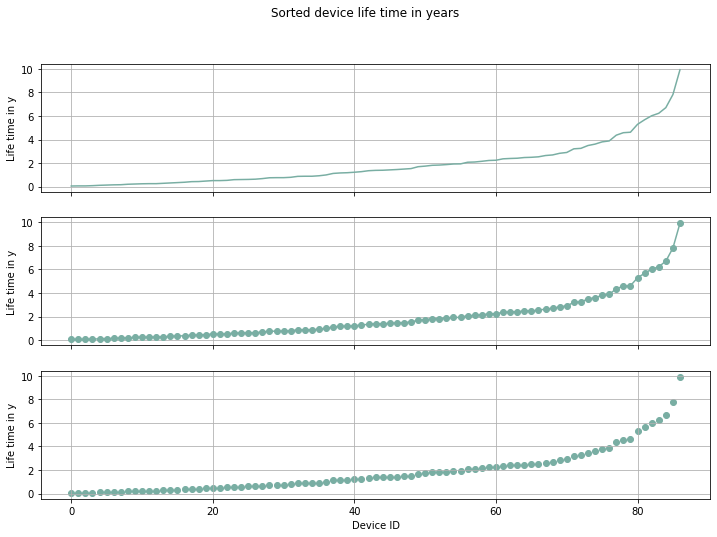

In [3]:
fig, ax = plt.subplots(3, figsize=(12,8), sharex=True)
fig.suptitle('Sorted device life time in years')
ax[0].plot(x,y, color='#79AEA3')
ax[0].set_ylabel('Life time in y')
ax[0].grid()
ax[1].plot(x,y, marker='o', color='#79AEA3')
ax[1].set_ylabel('Life time in y')
ax[1].grid()
ax[2].scatter(x,y, color='#79AEA3')
ax[2].set_ylabel('Life time in y')
ax[2].set_xlabel('Device ID')
ax[2].grid()
fig.savefig('cooling_devices.png', bbox_inches='tight', transparent=True)

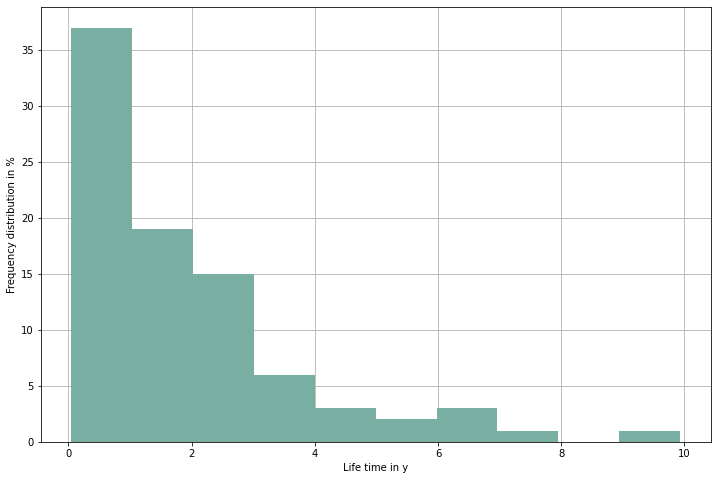

In [4]:
nbin = 10
fig = plt.figure(figsize=(12,8))
plt.hist(y, bins=nbin, zorder=10, color='#79AEA3')
plt.grid()
plt.ylabel('Frequency distribution in %')
plt.xlabel('Life time in y')
fig.savefig('cooling_hist_' + str(nbin) + '.png', bbox_inches='tight', transparent=True)

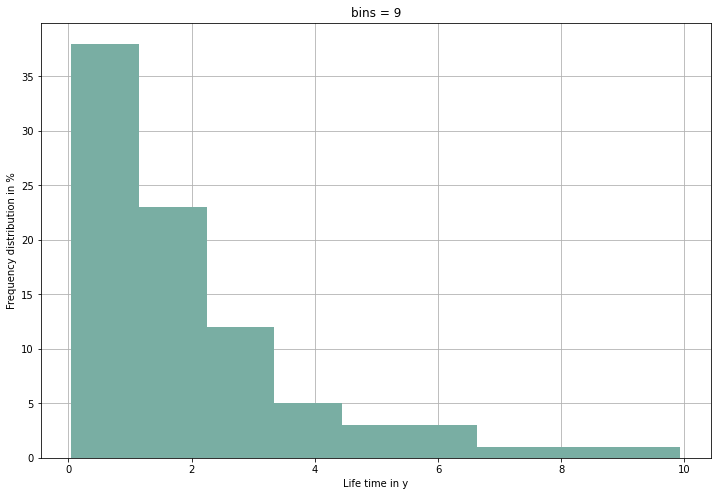

In [5]:
nbin = 9
fig = plt.figure(figsize=(12,8))
plt.title('bins = ' + str(nbin))
plt.hist(y, bins=nbin, zorder=10, color='#79AEA3')
plt.grid()
plt.ylabel('Frequency distribution in %')
plt.xlabel('Life time in y')
fig.savefig('cooling_hist_' + str(nbin) + '.png', bbox_inches='tight', transparent=True)

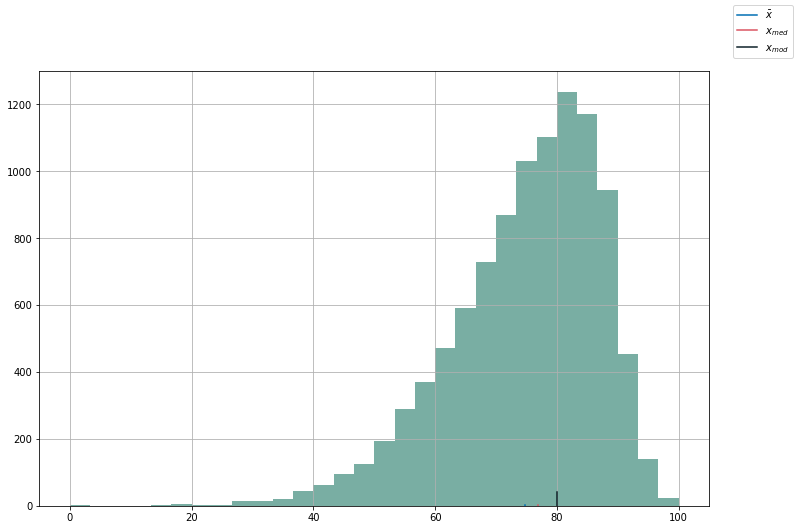

In [6]:
numValues = 10000
maxValue = 100
skewness = -5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a=skewness, loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.

fitted_data = scipy.stats.distributions.norm.pdf(random, random.mean(), random.var())

#Plot histogram to check skewness
fig = plt.figure(figsize=(12,8))
plt.grid()
his = plt.hist(random, 30, density=False, color='#79AEA3')
plt.plot([random.mean(), random.mean()], [0, 1], color='#006EB4', label=r'$\bar{x}$')
plt.plot([np.median(random), np.median(random)], [0, 1], color='#DB5461', label=r'${x}_{med}$')
plt.plot([his[1][np.argmax(his[0])], his[1][np.argmax(his[0])]], [0, np.abs(his[1][np.argmin(np.abs(his[0] - np.median(random)))])], color='#0B2027', label=r'${x}_{mod}$')
fig.legend()
#plt.ylim([0,0.032])
plt.show()
fig.savefig('left_skewed' + str(nbin) + '.png', bbox_inches='tight', transparent=True)

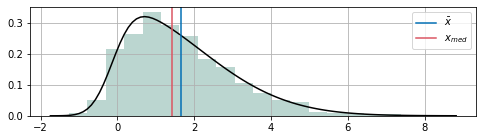

In [160]:
# choose some parameters
a, loc, scale = 5.3, -0.1, 2.2

# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)

# Plot the PDF.
fig = plt.figure(figsize=(8,2))
plt.grid()
Y, X, _ = plt.hist(data, bins=20, density=True, color='#79AEA3', alpha=0.5)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k')

# Statistic parameters
ymin, ymax = plt.ylim()

val = np.mean(data)
plt.plot([val, val], [0, 0.35], color='#006EB4', label=r'$\bar{x}$')

val = np.median(data)
plt.plot([val, val], [0,0.35], color='#DB5461', label=r'${x}_{med}$')

# val = np.argmax(Y[0])
# plt.plot([val, val], [0, 0.32], color='#0B2027', label=r'${x}_{mod}$')

#plt.plot([his[1][np.argmax(his[0])], his[1][np.argmax(his[0])]], [0, np.abs(his[1][np.argmin(np.abs(his[0] - np.median(random)))])], color='#0B2027', label=r'${x}_{mod}$')
# fig.legend()

plt.legend()
plt.ylim([0,0.35])
fig.savefig('left_skewed.png', bbox_inches='tight', transparent=True)

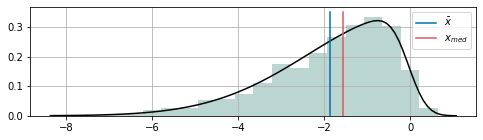

In [159]:
# choose some parameters
a, loc, scale = -5.3, -0.1, 2.2

# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)

# Plot the PDF.
fig = plt.figure(figsize=(8,2))
plt.grid()
Y, X, _ = plt.hist(data, bins=20, density=True, color='#79AEA3', alpha=0.5)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k')

# Statistic parameters
ymin, ymax = plt.ylim()

val = np.mean(data)
plt.plot([val, val], [0, 0.35], color='#006EB4', label=r'$\bar{x}$')

val = np.median(data)
plt.plot([val, val], [0,0.35], color='#DB5461', label=r'${x}_{med}$')

# val = np.argmax(Y[0])
# plt.plot([val, val], [0, 0.32], color='#0B2027', label=r'${x}_{mod}$')

#plt.plot([his[1][np.argmax(his[0])], his[1][np.argmax(his[0])]], [0, np.abs(his[1][np.argmin(np.abs(his[0] - np.median(random)))])], color='#0B2027', label=r'${x}_{mod}$')
# fig.legend()

plt.legend()
# #plt.ylim([0,0.032])
# plt.show()
fig.savefig('right_skewed.png', bbox_inches='tight', transparent=True)

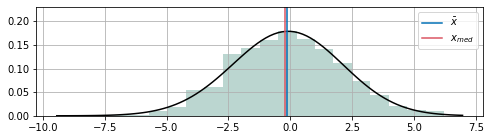

In [158]:
# choose some parameters
a, loc, scale = 0, -0.1, 2.2

# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(1000)
# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)

# Plot the PDF.
fig = plt.figure(figsize=(8,2))
plt.grid()
Y, X, _ = plt.hist(data, bins=20, density=True, color='#79AEA3', alpha=0.5)
xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
p = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k')

# Statistic parameters
ymin, ymax = plt.ylim()

val = np.mean(data)
plt.plot([val, val], [0, 0.35], color='#006EB4', label=r'$\bar{x}$')

val = np.median(data)
plt.plot([val, val], [0,0.35], color='#DB5461', label=r'${x}_{med}$')

# val = np.argmax(Y[0])
# plt.plot([val, val], [0, 0.32], color='#0B2027', label=r'${x}_{mod}$')

#plt.plot([his[1][np.argmax(his[0])], his[1][np.argmax(his[0])]], [0, np.abs(his[1][np.argmin(np.abs(his[0] - np.median(random)))])], color='#0B2027', label=r'${x}_{mod}$')
# fig.legend()

plt.legend()
plt.ylim([0,0.23])
# plt.show()
fig.savefig('neutral_skewed.png', bbox_inches='tight', transparent=True)

# val = np.max(np.abs(p))

In [125]:
[x[val], x[val]], [0, val]

0.3205494307895223


In [90]:
# 1) Get clostest matching point to the determined value


1.625384205712902

In [33]:
x_sorted = np.sort(y)

In [11]:
median = x_sorted[int(x_sorted.size/2)]

[0.05 0.06 0.06 0.08 0.11 0.13 0.15 0.16 0.2  0.22 0.24 0.25 0.25 0.28
 0.31 0.34 0.37 0.42 0.43 0.47 0.51 0.51 0.53 0.59 0.6  0.61 0.63 0.68
 0.75 0.76 0.76 0.79 0.87 0.88 0.88 0.92 0.99 1.12 1.16 1.18 1.22 1.27
 1.35 1.38 1.39 1.42 1.45 1.49 1.53 1.69 1.74 1.81 1.83 1.87 1.92 1.93
 2.07 2.09 2.15 2.22 2.24 2.36 2.39 2.41 2.47 2.49 2.53 2.64 2.69 2.83
 2.9  3.21 3.25 3.49 3.61 3.8  3.88 4.37 4.58 4.62 5.29 5.68 6.02 6.23
 6.71 7.82 9.93]


In [14]:
x_sorted[int(x_sorted.size/2)]

1.38

In [15]:
x_sorted.size/2

43.5

In [81]:
def quantile(x, n=None, p=0.25):
    """
    Determines the p-quantile of a given array. \n
    :param x: input array
    :type x: np.array
    
    """
    if isinstance(x, np.ndarray): 
        n = x.size
    if (n*p) % 2 == 0:
        return 0.5*(x[int(n*p)] + x[int(n*p) + 1]), int(n*p)
    else: 
        return x[int(np.floor(n*p)) + 1], int(n*p)

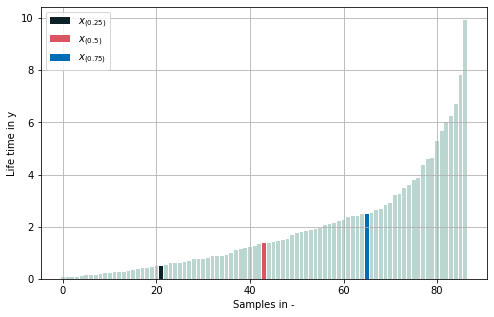

In [82]:
fig = plt.figure(figsize=(8,5))
plt.grid()
plt.bar(x, x_sorted, color='#79AEA3', alpha=0.5)

# Median = 0.25 quantile
quant = 0.25
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#0B2027', label=r'$x_{(' + str(quant) + ')}$')

# Median = 0.5 quantile
quant = 0.5
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#DB5461', label=r'$x_{(' + str(quant) + ')}$')

# Median = 0.75 quantile
quant = 0.75
val, pos = quantile(x=y, p=quant)
plt.bar(x[pos], x_sorted[pos], color='#006EB4', label=r'$x_{(' + str(quant) + ')}$')

plt.xlabel('Samples in -')
plt.ylabel('Life time in y')
plt.legend()
fig.savefig('median.png', bbox_inches='tight', transparent=True)

In [47]:
val, pos = quantile(x=y)

In [67]:
int(np.floor(3.1))

3

In [78]:
np.floor(3.1)

3.0

In [116]:
df.head()

,Exam Points,Grade,Absolute frequency,Relative frequency,Frequency distribution
0,0–20,5,57,0.208,0.010
1,20–30,4,93,0.339,0.034
2,30–37,3,92,0.336,0.048
3,37–46,2,29,0.106,0.012
4,46–51,1,3,0.011,0.020


In [117]:
df.columns

Index(['Exam Points', 'Grade', 'Absolute frequency', 'Relative frequency',
       'Frequency distribution'],
      dtype='object')

In [119]:
print(df['Relative frequency'].sum())

1.0
0.124


Text(0.5, 1.0, 'hist = hist / hist.sum()')

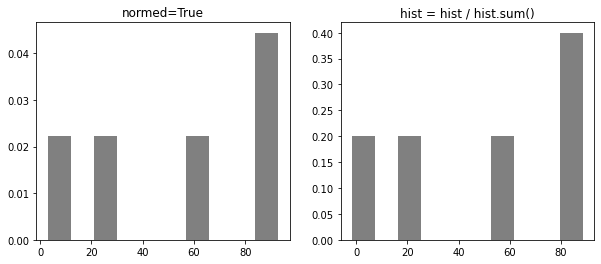

In [100]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(x, density=True, color='grey')

hist, bins = np.histogram(x)
ax[1].bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')

ax[0].set_title('normed=True')
ax[1].set_title('hist = hist / hist.sum()')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

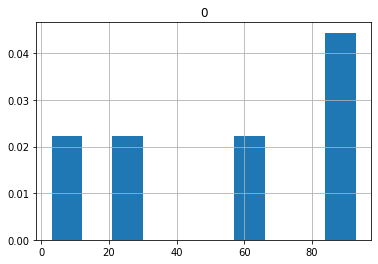

In [102]:
x.hist(density=1)

In [121]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.','Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

NameError: name 'flights' is not defined